In [13]:
# importing the necessary libraries
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.rcParams['font.size'] = 9
import os
import cv2
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import LabelEncoder
import random
from distutils.file_util import copy_file

In [2]:
# Foldername of path to dataset
DATA_PATH = 'alldata'

# There are two classes of interests among the images in dataset
cls_of_int = ['COVID', 'Normal']

In [14]:
# Function to print a list of images with their path and label
def ImageGrid(pathList,label, basePath):
    fig, axs = plt.subplots(2,3, figsize=(10,10), squeeze = True)
    axs = axs.reshape(-1)
    for ax, img in zip(axs,pathList):
        img = cv2.imread(os.path.join(basePath,img))
        ax.set_xlabel(label, fontsize=12)
        ax.imshow(img)

# Exploratory Data Analysis

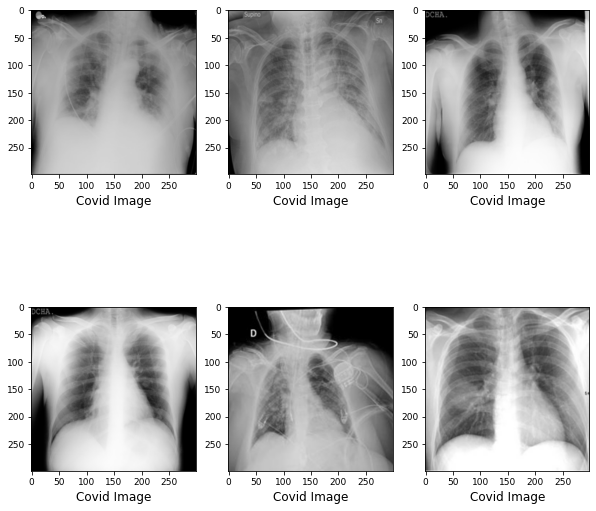

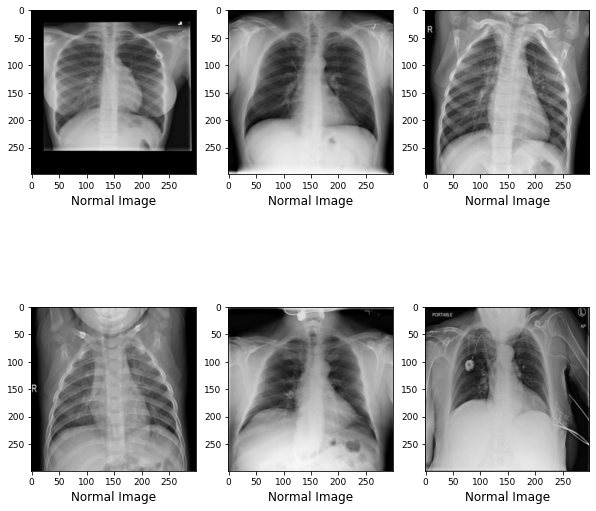

In [4]:
# The path of all covid data
covid19img_path = os.path.join(DATA_PATH, cls_of_int[0])
# reading all the covid images from that path
covidimgs = os.listdir(covid19img_path)
# Print first 6 covid images
ImageGrid(covidimgs[:6],"Covid Image",covid19img_path)

# The path of all normal data
normalimg_path = os.path.join(DATA_PATH, cls_of_int[1])
# reading all the normal images
normalimgs = os.listdir(normalimg_path)
# Print first 6 normal images
ImageGrid(normalimgs[:6], "Normal Image",normalimg_path)

In [5]:
# printing the count of images in both classes
print(f'Number of Covid Images {len(covidimgs)}')
print(f'Number of Normal Images {len(normalimgs)}')

Number of Covid Images 3616
Number of Normal Images 10192


In [6]:
# Method to read all images into an array
def read_image():
    for image in covidimgs:
        # Getting the image path
        fullpath = os.path.join(covid19img_path,image)
        # reading the image
        img = cv2.imread(fullpath,cv2.IMREAD_COLOR)
        # resizing the image
        img = cv2.resize(img,(100,100))
        train_images.append(img)
        label.append(1.0)
    
    for image in normalimgs:
        # Getting the image path
        fullpath = os.path.join(normalimg_path,image)
        # reading the image
        img = cv2.imread(fullpath,cv2.IMREAD_COLOR)
        # resizing the image
        img = cv2.resize(img,(100,100))
        train_images.append(img)
        label.append(0.0)


In [7]:
# Creating array for training
train_images = []
label = []
# Calling the read image method to create the image array
read_image()

In [8]:
train_images = np.array(train_images)

# Normalizing the data
train_images = train_images/255

# Using label encoder to encode the label 
labelEncoder = LabelEncoder()
labels = labelEncoder.fit_transform(label)

#splitting the data into train and test data
x_train,x_valid,y_train,y_valid = train_test_split(train_images,labels,test_size = 0.15,random_state = 45,shuffle=True)

In [9]:
# Defining the model
model = Sequential()
model.add(Conv2D(64,kernel_size = (3,3),activation='relu',input_shape = (100,100,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(64,kernel_size = (3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(512, activation='relu'))

# Since the number of classes are 2 and it is a classification problem a softmax layer is added
model.add(Dense(2,activation='softmax'))

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [10]:
# Adding earlystopping
from tensorflow.keras.callbacks import EarlyStopping

# specified the patience value as 10
early_stop=EarlyStopping(monitor='val_loss',patience=10)

# fitting the model with 20 epochs
model.fit(x_train,y_train,epochs=20,validation_data=(x_valid,y_valid),callbacks=[early_stop])

Epoch 1/20
367/367 [==============================] - 237s 630ms/step - loss: 0.7653 - accuracy: 0.7679 - val_loss: 0.3117 - val_accuracy: 0.8697
Epoch 2/20
367/367 [==============================] - 187s 509ms/step - loss: 0.2827 - accuracy: 0.8783 - val_loss: 0.2177 - val_accuracy: 0.9107
Epoch 3/20
367/367 [==============================] - 191s 520ms/step - loss: 0.2273 - accuracy: 0.9053 - val_loss: 0.1691 - val_accuracy: 0.9300
Epoch 4/20
367/367 [==============================] - 186s 507ms/step - loss: 0.1560 - accuracy: 0.9375 - val_loss: 0.1562 - val_accuracy: 0.9426
Epoch 5/20
367/367 [==============================] - 173s 471ms/step - loss: 0.1190 - accuracy: 0.9570 - val_loss: 0.1581 - val_accuracy: 0.9411
Epoch 6/20
367/367 [==============================] - 171s 466ms/step - loss: 0.1062 - accuracy: 0.9597 - val_loss: 0.1289 - val_accuracy: 0.9556
Epoch 7/20
367/367 [==============================] - 187s 510ms/step - loss: 0.0870 - accuracy: 0.9667 - val_loss: 0.1620 -

In [11]:
# Evaluating the model
score = model.evaluate(x_valid,y_valid,batch_size=32)

# Printing the results
print("Accuracy: {:.2f}%".format(score[1] * 100))
print("Loss: ",score[0])

65/65 [==============================] - 6s 97ms/step - loss: 0.1479 - accuracy: 0.9561
Accuracy: 95.61%
Loss:  0.1479092687368393


In [15]:
# Printing the results
print("Accuracy: {:.2f}%".format(score[1] * 100))
print("Loss: ",score[0])

Accuracy: 85.42%
Loss:  0.1479092687368393


In [12]:
Stop code here

SyntaxError: invalid syntax (<ipython-input-12-17c473544828>, line 1)

# Data Preparation (Folder Setup, Data Split, Data Augmentation)

Splitting test and train data into folders

#### Folder Setup

In [ ]:
def create_folder(path):
    if(os.path.exists(path) == False):
        os.mkdir(path)

In [ ]:
basePath = "Data"
trainPath = os.path.join(basePath,"train")
trainCovid = os.path.join(trainPath,"Covid")
trainNormal = os.path.join(trainPath,"Normal")
testPath = os.path.join(basePath,"test")
testCovid = os.path.join(testPath,"Covid")
testNormal = os.path.join(testPath,"Normal")
validCovid = os.path.join(basePath,"valid","Covid")
validNormal = os.path.join(basePath,"valid","Normal")
create_folder(basePath)
create_folder(testPath)
create_folder(trainPath)
create_folder(trainCovid)
create_folder(trainNormal)
create_folder(testCovid)
create_folder(testNormal)

#### Split & Copy Images

In [ ]:
covid_imgs = []
normal_imgs = []

for image in covidimgs:
   covid_imgs.append(os.path.join(covid19img_path,image))

for image in normalimgs:
    normal_imgs.append(os.path.join(normalimg_path,image))
    
# Shuffling the images to make sure the score is not because of any specific set of data
random.shuffle(covid_imgs)
random.shuffle(normal_imgs)
    
# Splitting test and train data in 80:20 %
covid_test_length = round(len(covid_imgs) * 0.8)
normal_test_length = round(len(normal_imgs) * 0.8)

for i in range(len(covidimgs)):
    if i < covid_test_length:
        copy_file(covid_imgs[i],trainCovid)
    else:
        copy_file(covid_imgs[i],testCovid)
               
for i in range(len(normal_imgs)):
    if i < normal_test_length:
        copy_file(normal_imgs[i],trainNormal)
    else:
        copy_file(normal_imgs[i],testNormal)

In [ ]:
covid_train_imgs = []
normal_train_imgs = []

covidtrainimgs = os.listdir(trainCovid)
normaltrainimgs = os.listdir(trainNormal)

for image in covidtrainimgs:
   covid_train_imgs.append(os.path.join(covid19img_path,image))

for image in normaltrainimgs:
   normal_train_imgs.append(os.path.join(covid19img_path,image))

covid_valid_length = round(len(covid_train_imgs) * 0.8)
normal_valid_length = round(len(normal_train_imgs) * 0.8)

for i in range(len(covidtrainimgs)):
    if i > covid_valid_length:
        copy_file(covid_imgs[i],validCovid)
               
for i in range(len(normaltrainimgs)):
    if i > normal_valid_length:
        copy_file(normal_imgs[i],validNormal)
